## Face Mask Identification Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from tensorflow import keras 
from skimage.transform import resize 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.utils import shuffle

In [3]:
pwd

'C:\\Users\\sreer\\Edure\\Data Science\\deep learning\\deep learning capstone projects\\Face mask'

In [5]:
import glob 

In [19]:
with_mask = glob.glob('with_mask 1/with_mask 1/*.jpg')
without_mask = glob.glob('without_mask/without_mask/*.jpg')

In [17]:
with_mask

['with_mask 1/with_mask 1\\0_0_0 copy 10.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 11.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 12.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 13.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 14.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 15.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 16.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 17.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 18.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 19.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 20.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 21.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 22.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 23.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 24.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 25.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 26.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 27.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 28.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 29.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 3.jpg',
 'with_mask 1/

In [21]:
without_mask

['without_mask/without_mask\\0_0_chenyao_0051.jpg',
 'without_mask/without_mask\\0_0_chenyao_0053.jpg',
 'without_mask/without_mask\\0_0_chenyao_0063.jpg',
 'without_mask/without_mask\\0_0_dongchengpeng_0020.jpg',
 'without_mask/without_mask\\0_0_dongchengpeng_0021.jpg',
 'without_mask/without_mask\\0_0_dongchengpeng_0042.jpg',
 'without_mask/without_mask\\0_0_fanshiqi_0002.jpg',
 'without_mask/without_mask\\0_0_fanshiqi_0012.jpg',
 'without_mask/without_mask\\0_0_fanshiqi_0029.jpg',
 'without_mask/without_mask\\0_0_fanshiqi_0089.jpg',
 'without_mask/without_mask\\0_0_fanshiqi_0092.jpg',
 'without_mask/without_mask\\0_0_fanshiqi_0094.jpg',
 'without_mask/without_mask\\0_0_fanwei_0012.jpg',
 'without_mask/without_mask\\0_0_fanwei_0017.jpg',
 'without_mask/without_mask\\0_0_fanyichen_0011.jpg',
 'without_mask/without_mask\\0_0_fanyichen_0018.jpg',
 'without_mask/without_mask\\0_0_fanyichen_0029.jpg',
 'without_mask/without_mask\\0_0_fanyichen_0040.jpg',
 'without_mask/without_mask\\0_0_f

In [29]:
with_mask_test = glob.glob('with_mask 1/with_mask 1/*.jpg')
without_mask_test = glob.glob('without_mask/without_mask/*.jpg')

In [31]:
with_mask_test

['with_mask 1/with_mask 1\\0_0_0 copy 10.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 11.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 12.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 13.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 14.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 15.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 16.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 17.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 18.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 19.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 20.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 21.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 22.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 23.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 24.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 25.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 26.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 27.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 28.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 29.jpg',
 'with_mask 1/with_mask 1\\0_0_0 copy 3.jpg',
 'with_mask 1/

In [33]:
without_mask_test

['without_mask/without_mask\\0_0_chenyao_0051.jpg',
 'without_mask/without_mask\\0_0_chenyao_0053.jpg',
 'without_mask/without_mask\\0_0_chenyao_0063.jpg',
 'without_mask/without_mask\\0_0_dongchengpeng_0020.jpg',
 'without_mask/without_mask\\0_0_dongchengpeng_0021.jpg',
 'without_mask/without_mask\\0_0_dongchengpeng_0042.jpg',
 'without_mask/without_mask\\0_0_fanshiqi_0002.jpg',
 'without_mask/without_mask\\0_0_fanshiqi_0012.jpg',
 'without_mask/without_mask\\0_0_fanshiqi_0029.jpg',
 'without_mask/without_mask\\0_0_fanshiqi_0089.jpg',
 'without_mask/without_mask\\0_0_fanshiqi_0092.jpg',
 'without_mask/without_mask\\0_0_fanshiqi_0094.jpg',
 'without_mask/without_mask\\0_0_fanwei_0012.jpg',
 'without_mask/without_mask\\0_0_fanwei_0017.jpg',
 'without_mask/without_mask\\0_0_fanyichen_0011.jpg',
 'without_mask/without_mask\\0_0_fanyichen_0018.jpg',
 'without_mask/without_mask\\0_0_fanyichen_0029.jpg',
 'without_mask/without_mask\\0_0_fanyichen_0040.jpg',
 'without_mask/without_mask\\0_0_f

In [35]:
len(with_mask)

1696

In [37]:
len(without_mask)

1792

In [39]:
len(with_mask_test
   )

1696

In [41]:
len(without_mask_test)

1792

In [43]:
# training data

image = []
label =[]

for i in with_mask:
    img=plt.imread(i)
    image.append(img)
    label.append(0)

for i in without_mask:
    img=plt.imread(i)
    image.append(img)
    label.append(1)

In [45]:
# training data

image_test = []
label_test =[]

for i in with_mask_test:
    img=plt.imread(i)
    image_test.append(img)
    label_test.append(0)

for i in without_mask_test:
    img=plt.imread(i)
    image_test.append(img)
    label_test.append(1)

In [49]:
image,label = shuffle(image,label,random_state=100)            #Train shuffle

In [51]:
image_test,label_test = shuffle(image_test,label_test,random_state=100)       #test shuffle

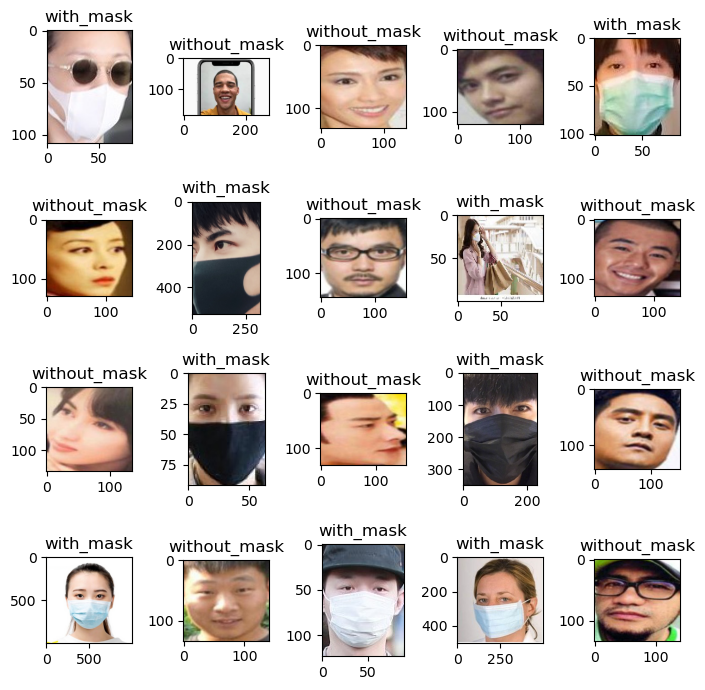

In [59]:
plt.figure(figsize=(7,7))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(image[i])
    
# plt.title(label[i])
    if label[i] == 1:
        plt.title('without_mask')
    else:
        plt.title('with_mask')
    plt.tight_layout()

In [61]:
# train resize 

xtrain =[]
for i in image:
    xtrain.append(resize(i,(64,64,3)))
xtrain =np.array(xtrain)

In [62]:
# test resize

xtest =[]
for i in image_test:
    xtest.append(resize(i,(64,64,3)))
xtest =np.array(xtest)

In [77]:
ytrain = np.array(label)
ytest = np.array(label_test)

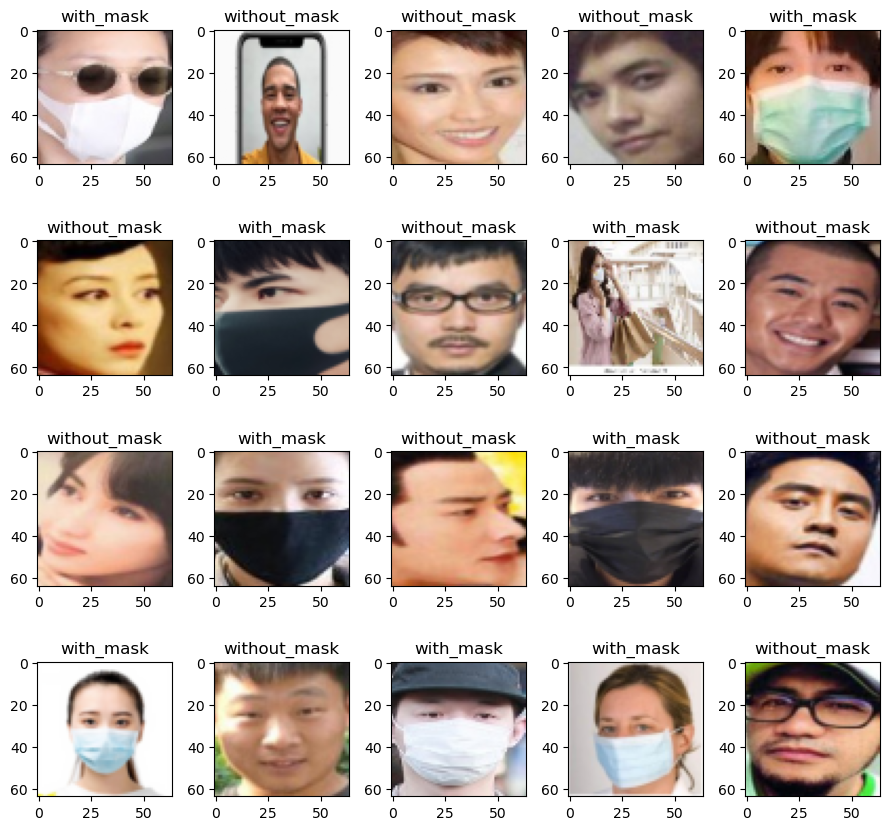

In [67]:
# plot image
plt.figure(figsize=(9,9))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(xtrain[i])
# plt.title(label[i])
    if label[i] == 1:
        plt.title('without_mask')
    else:
        plt.title('with_mask')
    plt.tight_layout()

In [69]:
# CNN Model
model = keras.models.Sequential([
        keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(64,64,3)),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(32,(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),                    
        keras.layers.Dense(1,activation= 'sigmoid')
])

C:\Users\sreer\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,625 (1.55 MB)

 Trainable params: 406,625 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model.fit(xtrain,ytrain,epochs=5,validation_split=0.1)

Epoch 1/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.6217 - loss: 0.6350 - val_accuracy: 0.8997 - val_loss: 0.3044
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9113 - loss: 0.2350 - val_accuracy: 0.9370 - val_loss: 0.2009
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9449 - loss: 0.1554 - val_accuracy: 0.9398 - val_loss: 0.1740
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9518 - loss: 0.1380 - val_accuracy: 0.8797 - val_loss: 0.2805
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9386 - loss: 0.1592 - val_accuracy: 0.9370 - val_loss: 0.1718


In [81]:
model.evaluate(xtrain,ytrain)

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9637 - loss: 0.1040


[0.10177435725927353, 0.9647362232208252]

In [83]:
# prediction 
prediction = model.predict(xtest)

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [85]:
prediction

array([[0.00527609],
       [0.9998704 ],
       [0.45941502],
       ...,
       [0.9960623 ],
       [0.9980396 ],
       [0.34315732]], dtype=float32)

In [87]:
prediction
pred =[]
for i in prediction:
    if i<0.5:
        pred.append(0)
    else:
        pred.append(1)

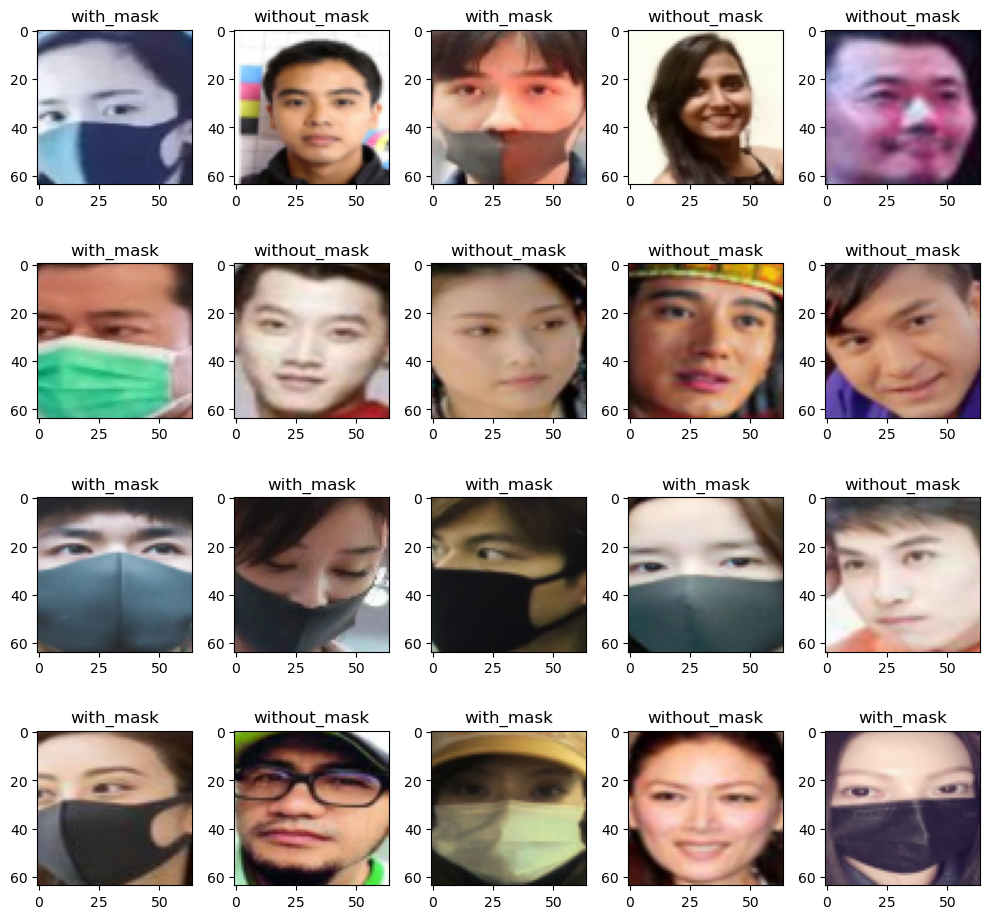

In [89]:
# plot image
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(xtest[i])
    
# plt.title(label[i])
    if pred[i] == 0:
        plt.title('with_mask')
    else:
        plt.title('without_mask')
    plt.tight_layout()

In [91]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [93]:
print(confusion_matrix(ytest,pred))

[[1605   91]
 [  32 1760]]


In [95]:
ytest

array([0, 1, 0, ..., 1, 1, 0])

In [101]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1696
           1       0.95      0.98      0.97      1792

    accuracy                           0.96      3488
   macro avg       0.97      0.96      0.96      3488
weighted avg       0.97      0.96      0.96      3488



In [103]:
accuracy_score(ytest,pred)

0.9647362385321101

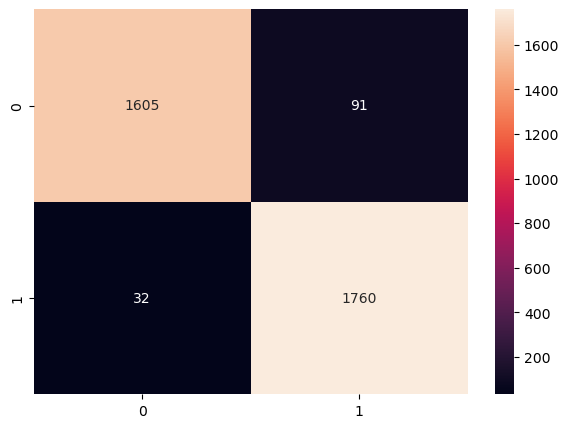

In [113]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(ytest,pred), annot = True , fmt ='d')
plt.show()